* IDF(t) = log(Total number of documents / Number of documents with term t in it)
* TF(t,d) = (Number of times term t appears in the document d) / (Total number of terms in the document d)
* TF-IDF(t,d) = TF(t,d) * IDF(t)
* Does not take into account the position of the word in the document
* As dimensionality increases, sparsity increases
* Doesn't address out of vocabulary words

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [13]:
vectorizer = TfidfVectorizer()
transformed_output = vectorizer.fit_transform(corpus)
print(vectorizer.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [14]:
all_feature_names = vectorizer.get_feature_names_out()

for word in all_feature_names:
    index = vectorizer.vocabulary_[word]
    print(f"Word: {word}, Idf: {vectorizer.idf_[index]}")

Word: already, Idf: 2.386294361119891
Word: am, Idf: 2.386294361119891
Word: amazon, Idf: 2.386294361119891
Word: and, Idf: 2.386294361119891
Word: announcing, Idf: 1.2876820724517808
Word: apple, Idf: 2.386294361119891
Word: are, Idf: 2.386294361119891
Word: ate, Idf: 2.386294361119891
Word: biryani, Idf: 2.386294361119891
Word: dot, Idf: 2.386294361119891
Word: eating, Idf: 1.9808292530117262
Word: eco, Idf: 2.386294361119891
Word: google, Idf: 2.386294361119891
Word: grapes, Idf: 2.386294361119891
Word: iphone, Idf: 2.386294361119891
Word: ironman, Idf: 2.386294361119891
Word: is, Idf: 1.1335313926245225
Word: loki, Idf: 2.386294361119891
Word: microsoft, Idf: 2.386294361119891
Word: model, Idf: 2.386294361119891
Word: new, Idf: 1.2876820724517808
Word: pixel, Idf: 2.386294361119891
Word: pizza, Idf: 2.386294361119891
Word: surface, Idf: 2.386294361119891
Word: tesla, Idf: 2.386294361119891
Word: thor, Idf: 2.386294361119891
Word: tomorrow, Idf: 1.2876820724517808
Word: you, Idf: 2.

In [15]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [16]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

# E-Commerce Item Category Classification:

* Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories.
* Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification


In [17]:
import pandas as pd

df = pd.read_csv("Ecommerce_data.csv")
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [18]:
print(df.label.value_counts())

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64


In [19]:
df["num_label"] = df.label.map({"Household": 0, "Electronics": 1, "Clothing & Accessories": 2, "Books": 3})
df.head()

,Text,label,num_label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


Train/Test Split: 80/20

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["Text"], 
                                                    df["num_label"],
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=df["num_label"])
print(X_train.shape, X_test.shape)

(19200,) (4800,)


In [21]:
X_train[:2].head()

5564    Creative Education Aids 0620 Animal Families a...
9566            Creative World of Paper Folding - Book 1 
Name: Text, dtype: object

In [22]:
y_train.value_counts()

3    4800
2    4800
1    4800
0    4800
Name: num_label, dtype: int64

In [23]:
y_test.value_counts()

0    1200
1    1200
2    1200
3    1200
Name: num_label, dtype: int64

Attempt 1 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

Note

* use TF-IDF for pre-processing the text.

* use KNN as the classifier

* print the classification report.

In [24]:
# import pipeline, KNN, classification report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# create a pipeline
clf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("knn", KNeighborsClassifier())
])

# fit the pipeline
clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1200
           1       0.97      0.96      0.96      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.96      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [25]:
X_test[:5]

10572    Deco Home Cotton Modern Arabesque Bedding, Kin...
23834    Sky Tech® High Speed External Memory Card Read...
13988    Allen Solly Men's Cotton Handkerchief Navy/Sky...
10777    Samriddhi Artificial Leaves Garlands/Creepers ...
11896    Seagate 2TB Backup Plus Slim (Blue) USB 3.0 Ex...
Name: Text, dtype: object

In [26]:
y_test[:5]

10572    0
23834    1
13988    2
10777    0
11896    1
Name: num_label, dtype: int64

In [27]:
y_pred[:5]

array([0, 1, 2, 0, 1], dtype=int64)

Attempt 2 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

Note:

* use TF-IDF for pre-processing the text.

* use MultinomialNB as the classifier.

* print the classification report.

In [28]:
from sklearn.naive_bayes import MultinomialNB

# create a pipeline
clf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("nb", MultinomialNB())
])

# fit the pipeline
clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.99      0.94      0.96      1200

    accuracy                           0.96      4800
   macro avg       0.97      0.96      0.96      4800
weighted avg       0.97      0.96      0.96      4800



Attempt 3 :

using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

Note:

* use TF-IDF for pre-processing the text.

* use Random Forest as the classifier.

* print the classification report.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# create a pipeline
clf = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("rf", RandomForestClassifier(n_estimators=100))
])

# fit the pipeline
clf.fit(X_train, y_train)

# predict on test data
y_pred = clf.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.98      0.97      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.97      0.98      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [30]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

c:\Users\FURKANSALMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
df["clean_text"] = df["Text"].apply(preprocess)

In [32]:
df.head()

,Text,label,num_label,clean_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer Women Art Mysore Silk Saree Bl...


Build a model with pre processed text

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    df.clean_text, 
    df.num_label,
    test_size=0.2,
    random_state=42,
    stratify=df.num_label
)

In [37]:
# create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

# fit with X_train and y_train
clf.fit(X_train, y_train)


# get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


# print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1200
           1       0.98      0.97      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



Text(95.72222222222221, 0.5, 'Truth')

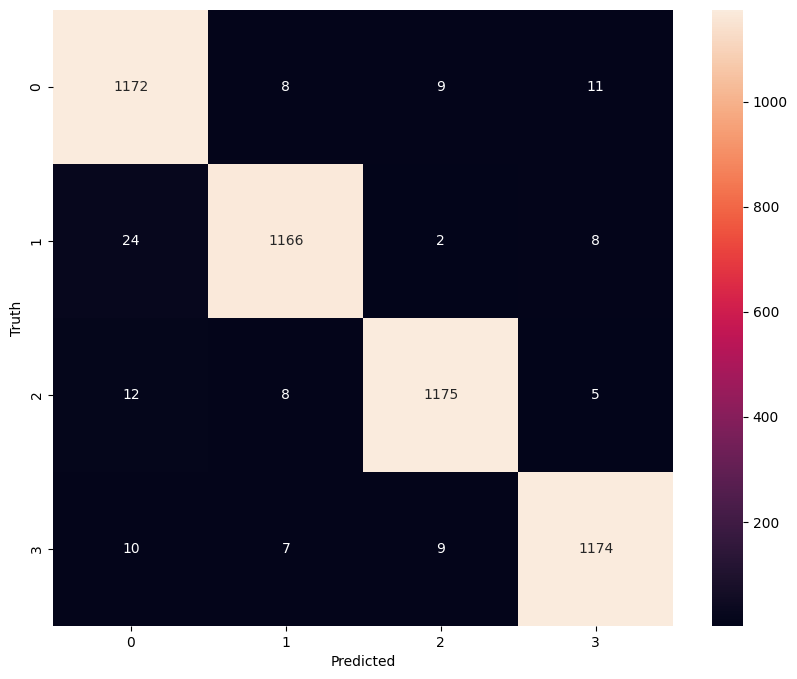

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')